In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [11]:
df = pd.read_csv("AB_NYC_2019.csv")

In [13]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
df = df.dropna(subset = ["price","neighbourhood_group","room_type","latitude","longitude"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [21]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [23]:
#Removing Outliers where price is less than 500$
df = df[df["price"]<=500]

In [25]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.785100e+04,4.785100e+04,47851.000000,47851.000000,47851.000000,47851.000000,47851.000000,38221.000000,47851.000000,47851.000000
mean,1.898151e+07,6.716261e+07,40.728815,-73.951657,131.530564,6.981547,23.546613,1.377376,7.076487,111.206767
std,1.096475e+07,7.828958e+07,0.054775,0.046241,88.063220,20.386368,44.821004,1.685547,32.759608,130.976999
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.461212e+06,7.766972e+06,40.689830,-73.982670,68.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.962335e+07,3.058512e+07,40.722630,-73.955210,100.000000,2.000000,5.000000,0.720000,1.000000,43.000000
75%,2.907369e+07,1.072681e+08,40.763250,-73.935585,172.000000,5.000000,24.000000,2.030000,2.000000,221.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,500.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [27]:
#Adding one more feature
df["Distance from times square"] = np.sqrt((df['latitude'] - 40.7580)**2 + (df['longitude'] - (-73.9855))**2 )

In [29]:
#selecting relevant features
features = ["neighbourhood_group","room_type","latitude","longitude","minimum_nights","number_of_reviews","Distance from times square"]
target = "price"

In [31]:
X = df[features]
y= df[target]

### Exploratory Data analysis

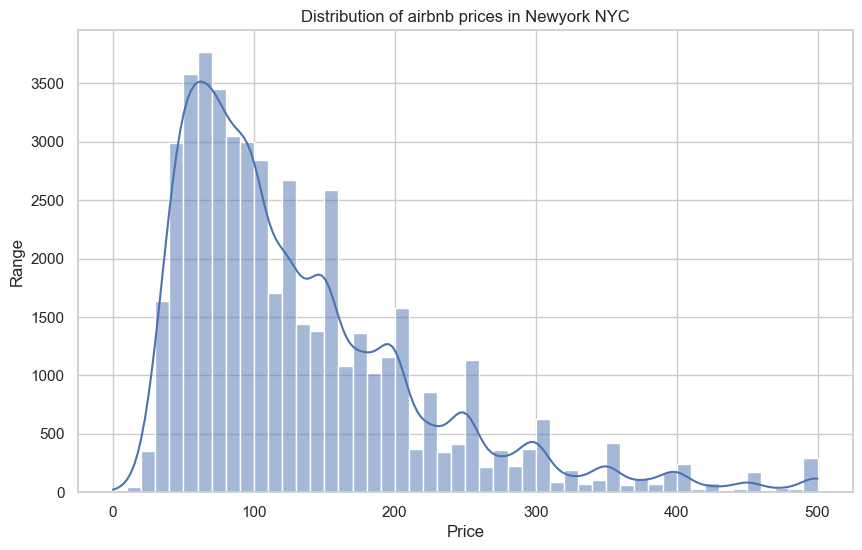

In [34]:
#set up the visualization style
sns.set(style = "whitegrid")

#Price Distribution
plt.figure(figsize = (10,6))
sns.histplot(df["price"],bins = 50,kde = True)
plt.title("Distribution of airbnb prices in Newyork NYC")
plt.xlabel("Price")
plt.ylabel("Range")
plt.show()

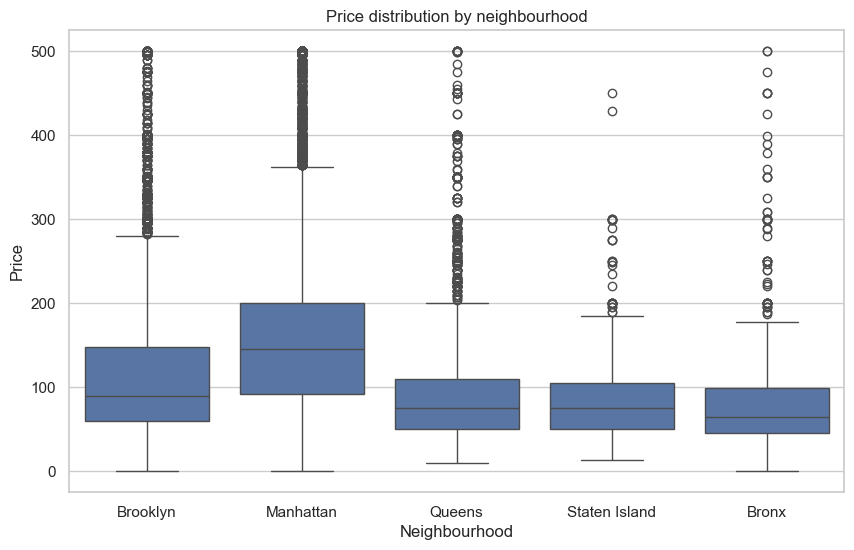

In [36]:
#Price by neighbourhood
plt.figure(figsize = (10,6))
sns.boxplot(x ="neighbourhood_group", y = 'price',data = df)
plt.title("Price distribution by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.show()

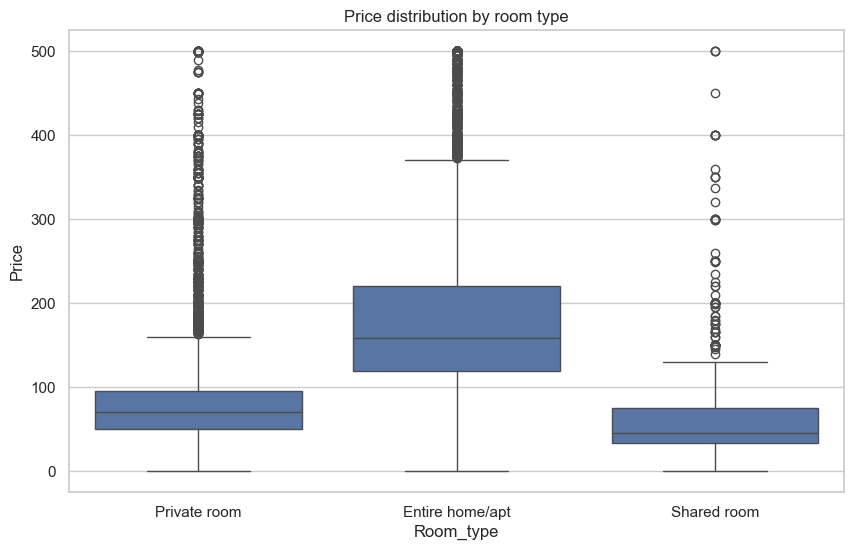

In [38]:
#Price by roomtype
plt.figure(figsize = (10,6))
sns.boxplot(x ="room_type", y = 'price',data = df)
plt.title("Price distribution by room type")
plt.xlabel("Room_type")
plt.ylabel("Price")
plt.show()

In [40]:
numerical_features = ["latitude","longitude","minimum_nights","number_of_reviews",'Distance from times square',"price"]

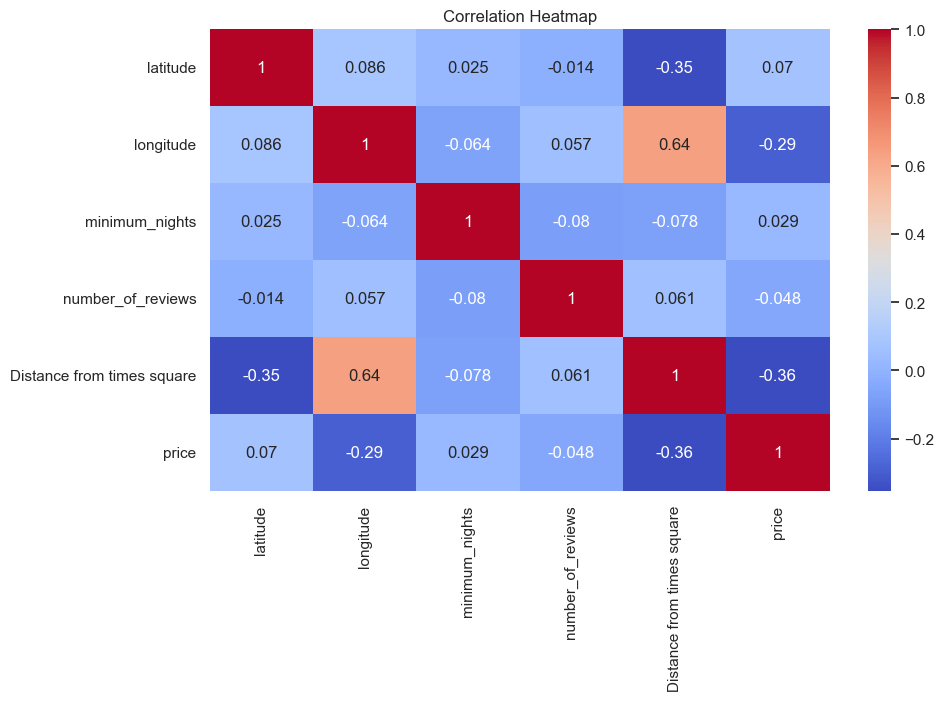

In [42]:
#to find the correaltion - Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df[numerical_features].corr(),annot=True,cmap = "coolwarm" )
plt.title("Correlation Heatmap")
plt.show()

In [44]:
#Data Processing Pipeline
#Define Preprocessing steps
numerical_features = ["latitude","longitude","minimum_nights","number_of_reviews",'Distance from times square']
categorical_features = ["neighbourhood_group","room_type"]

numerical_transformer = Pipeline(steps=[('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer,numerical_features),
                                            ('cat',categorical_transformer,categorical_features)])

#Splitting data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
#Regression Model Building and execution
#Creating a function to evaluate models
def evaluatemodel(model,X_train,X_test,y_train,y_test):
    pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                              ("model",model)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    cv_score = cross_val_score(pipeline,X_train,y_train,cv = 5,scoring='r2')

    print(f"Model:{model.__class__.__name__}")
    print(f"MSE:{mse:.2f}")
    print(f"RMSE:{rmse:.2f}")
    print(f"R2:{r2:.2f}")
    print(f"Cross Validation Score:{np.mean(cv_score):.2f} ± {np.std(cv_score):.2f}")
    print("\n")

    return pipeline

#Calling functions

lr = evaluatemodel(LinearRegression(),X_train,X_test,y_train,y_test)
ridge = evaluatemodel(Ridge(alpha = 1.0),X_train,X_test,y_train,y_test)
lasso = evaluatemodel(Lasso(alpha = 0.1),X_train,X_test,y_train,y_test)



Model:LinearRegression
MSE:4854.31
RMSE:69.67
R2:0.41
Cross Validation Score:0.41 ± 0.01


Model:Ridge
MSE:4854.34
RMSE:69.67
R2:0.41
Cross Validation Score:0.41 ± 0.01


Model:Lasso
MSE:4859.57
RMSE:69.71
R2:0.41
Cross Validation Score:0.41 ± 0.01




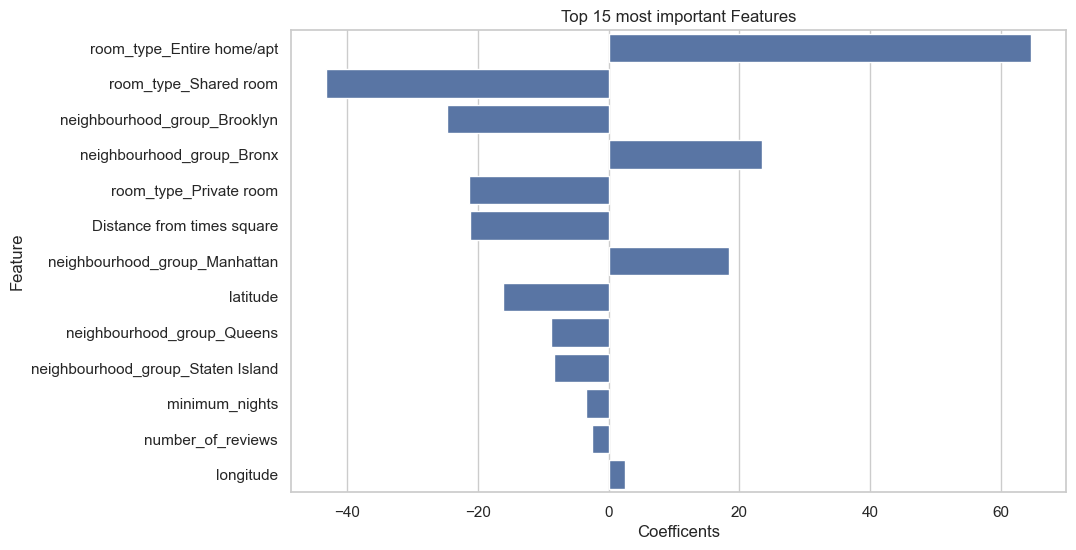

In [48]:
# Feature Important analysis
#Get feature names after one hot encoding
preprocessor.fit(X_train)
cat_features = preprocessor.named_transformers_["cat"].named_steps['onehot'].get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

#Get coefficients from the ridge model(best)
best_model = ridge
coeff = best_model.named_steps["model"].coef_

#Feature importance data frame
feature_importance = pd.DataFrame({'Feature': all_features,
                                  'Coefficient':coeff}).sort_values('Coefficient',key = abs,ascending = False)

#Plot feature importance
plt.figure(figsize = (10,6))
sns.barplot(x='Coefficient',y='Feature',data = feature_importance.head(15))
plt.title("Top 15 most important Features")
plt.xlabel("Coefficents")
plt.ylabel("Feature")
plt.show()


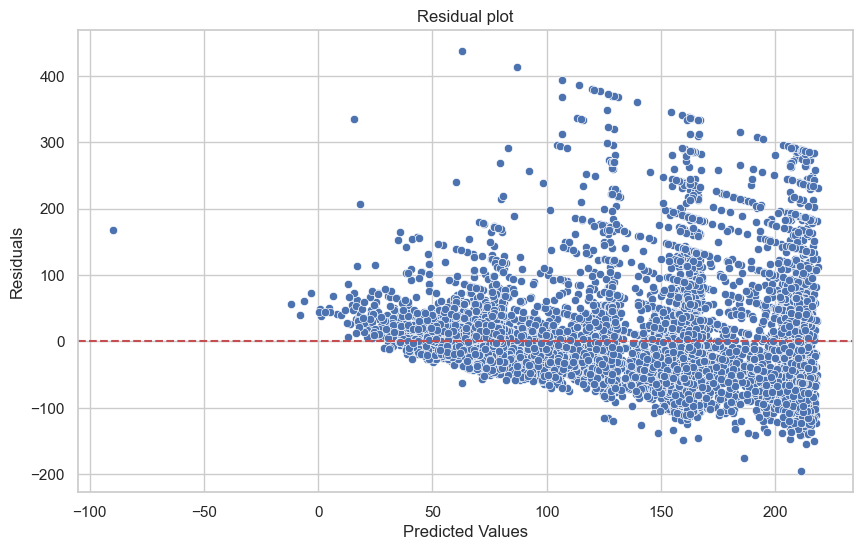

In [50]:
#Residual analysis
#Get prediction for best model
y_pred = best_model.predict(X_test)

#residual plot
residuals = y_test-y_pred
plt.figure(figsize = (10,6))
sns.scatterplot(x=y_pred , y = residuals)
plt.axhline(y=0,color='r',linestyle = "--")
plt.title("Residual plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


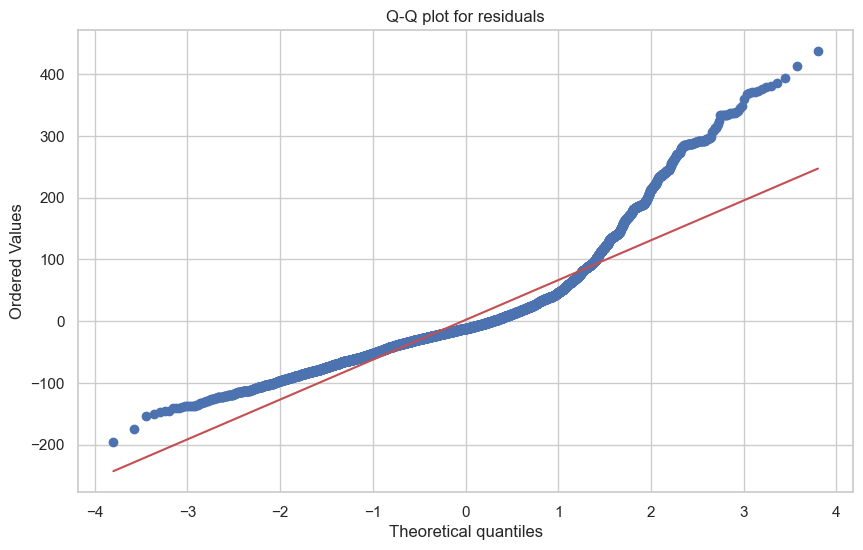

In [52]:
#Q-Q plot for normality check

from scipy import stats
plt.figure(figsize = (10,6))
stats.probplot(residuals,dist='norm',plot = plt)
plt.title("Q-Q plot for residuals")
plt.show()

In [54]:
#Price Prediction for new listing
new_listing = pd.DataFrame({'neighbourhood_group': ['Manhattan'],
    'room_type': ['Entire home/apt'],
    'latitude': [40.7128],
    'longitude': [-74.0060],
    'minimum_nights': [2],
    'number_of_reviews': [10],
    "Distance from times square": [0.05]})


predicted_price = best_model.predict(new_listing)
print(f"Predicted price for the above listing is ${predicted_price[0]:.2f} per night")

Predicted price for the above listing is $208.12 per night


In [56]:
print("\nKey Findings:")
print("1. Manhattan listings are higher prices")
print("2. Private rooms are cheaper than entire homes and apartemnts")
print("3. Listings closer to times square are expensive")


Key Findings:
1. Manhattan listings are higher prices
2. Private rooms are cheaper than entire homes and apartemnts
3. Listings closer to times square are expensive


In [58]:
import joblib
joblib.dump(best_model,'Airbnb_price_predictor.pkl')

['Airbnb_price_predictor.pkl']